In [1]:
!pip install pandas


In [6]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('E:\SKILLENABLE\INTERVIEW PREP\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## What is the average tenure of customers who churn?


In [5]:
# Filter the churned customers
churned_customers = df[df['Churn'] == 'Yes']

# Calculate the average tenure of churned customers
average_tenure = churned_customers['tenure'].mean()

print("Average tenure of churned customers:", average_tenure)


Average tenure of churned customers: 17.979133226324237


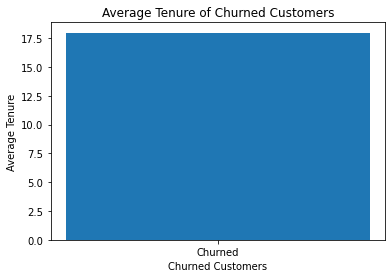

In [7]:
# Create a bar plot
plt.bar('Churned', average_tenure)

# Add labels and title to the plot
plt.xlabel('Churned Customers')
plt.ylabel('Average Tenure')
plt.title('Average Tenure of Churned Customers')

# Display the plot
plt.show()


## What is the correlation between gender and churn?


In [8]:
from scipy.stats import chi2_contingency


In [9]:
# Create a contingency table of gender and churn
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the correlation between gender and churn
print("Correlation between Gender and Churn:")
print("Chi-square value:", chi2)
print("P-value:", p)




Correlation between Gender and Churn:
Chi-square value: 0.4840828822091383
P-value: 0.48657873605618596


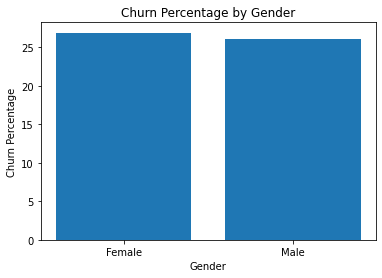

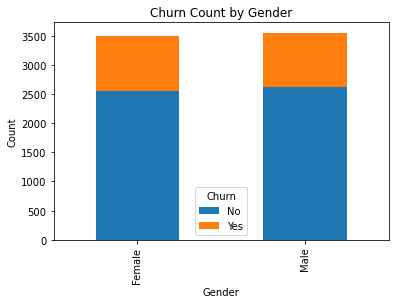

In [10]:
# Create a contingency table of gender and churn
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Calculate the percentage of churned customers by gender
total_by_gender = df['gender'].value_counts()
churn_percentage_by_gender = contingency_table['Yes'] / total_by_gender * 100

# Create a bar plot
plt.bar(churn_percentage_by_gender.index, churn_percentage_by_gender)

# Add labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Gender')

# Display the plot
plt.show()

# Create a stacked bar plot
contingency_table.plot(kind='bar', stacked=True)

# Add labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')

# Display the plot
plt.show()


## What is the difference in the average monthly charges between customers who churn and those who do not?


In [11]:
# Calculate the average monthly charges for customers who churned
churned_avg_monthly_charges = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()

# Calculate the average monthly charges for customers who did not churn
not_churned_avg_monthly_charges = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

# Calculate the difference in average monthly charges
difference = churned_avg_monthly_charges - not_churned_avg_monthly_charges

print("Difference in average monthly charges:")
print("Churned customers:", churned_avg_monthly_charges)
print("Not churned customers:", not_churned_avg_monthly_charges)
print("Difference:", difference)


Difference in average monthly charges:
Churned customers: 74.4413322632423
Not churned customers: 61.2651236953999
Difference: 13.176208567842401


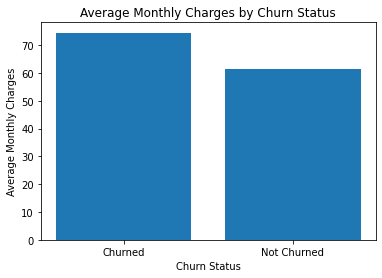

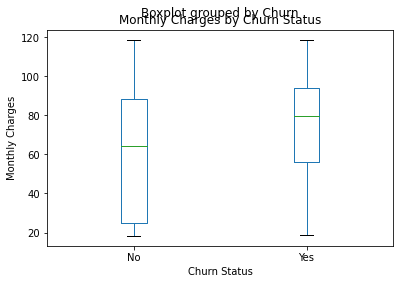

In [12]:
# Calculate the average monthly charges for customers who churned
churned_avg_monthly_charges = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()

# Calculate the average monthly charges for customers who did not churn
not_churned_avg_monthly_charges = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

# Create a bar plot
plt.bar(['Churned', 'Not Churned'], [churned_avg_monthly_charges, not_churned_avg_monthly_charges])

# Add labels and title to the plot
plt.xlabel('Churn Status')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Churn Status')

# Display the plot
plt.show()

# Create a box plot
df.boxplot(column='MonthlyCharges', by='Churn', grid=False)

# Add labels and title to the plot
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn Status')

# Display the plot
plt.show()


## What are the most popular internet services usage type among customers who churn?


In [13]:
# Filter the churned customers
churned_customers = df[df['Churn'] == 'Yes']

# Calculate the frequency distribution of internet services usage type
internet_services_usage = churned_customers['InternetService'].value_counts()

# Display the most popular internet services usage type
most_popular = internet_services_usage.idxmax()
popularity_count = internet_services_usage.max()

print("Most popular internet services usage type among churned customers:")
print("Internet services usage type:", most_popular)
print("Count:", popularity_count)


Most popular internet services usage type among churned customers:
Internet services usage type: Fiber optic
Count: 1297


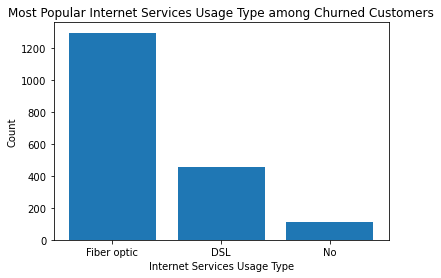

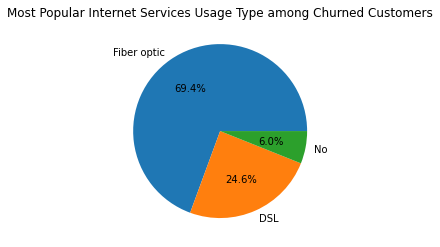

In [14]:
# Filter the churned customers
churned_customers = df[df['Churn'] == 'Yes']

# Calculate the frequency distribution of internet services usage type
internet_services_usage = churned_customers['InternetService'].value_counts()

# Create a bar plot
plt.bar(internet_services_usage.index, internet_services_usage)

# Add labels and title to the plot
plt.xlabel('Internet Services Usage Type')
plt.ylabel('Count')
plt.title('Most Popular Internet Services Usage Type among Churned Customers')

# Display the plot
plt.show()

# Create a pie chart
plt.pie(internet_services_usage, labels=internet_services_usage.index, autopct='%1.1f%%')

# Add title to the plot
plt.title('Most Popular Internet Services Usage Type among Churned Customers')

# Display the plot
plt.show()


## What is the trend in churn over time?


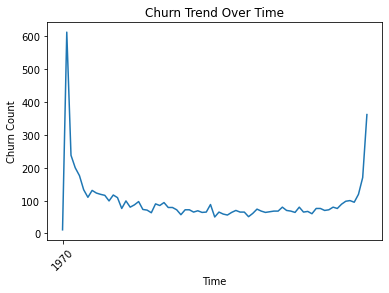

In [17]:
# Convert the 'ChurnDate' column to datetime
df['tenure'] = pd.to_datetime(df['tenure'])

# Group the data by 'ChurnDate' and calculate the count of churned customers
churn_count = df.groupby('tenure').size()

# Plot the churn trend over time
plt.plot(churn_count.index, churn_count.values)

# Add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Churn Count')
plt.title('Churn Trend Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


## What are the factors that are most important in determining whether a customer will churn?


Determining the most important factors in customer churn requires performing a predictive analysis, such as a machine learning model. These models can analyze various features and identify which ones have the most significant impact on predicting churn. However, without access to the dataset or specific information about the features available, it is challenging to provide an accurate answer.

In general, common factors that are often considered important in determining customer churn include:

* Contract Type: Customers on shorter-term contracts or those without long-term commitments may be more likely to churn.
* Monthly Charges: Higher monthly charges could potentially lead to higher churn rates.
* Tenure: Customers who have been with the company for a shorter duration may have a higher churn rate.
* Internet Services: The type and quality of internet services can play a role in customer satisfaction and, consequently, churn.
* Payment Method: Certain payment methods, such as automatic billing or online payment options, may be associated with lower churn rates.
* Customer Support: The quality and responsiveness of customer support services can impact customer satisfaction and churn rates.
* Service Reliability: Customers who frequently experience service interruptions or unreliable service may be more likely to churn.


Therefore, to determine the most important factors in predicting churn for a particular dataset, it is recommended to perform an analysis using appropriate machine learning models on the specific dataset that includes relevant features and churn labels.





